In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/processed/wikicssh/categories.csv")
category_levels = (df.level.
 value_counts()
 .sort_index()
 .to_frame()
 .assign(
     cumulative=lambda x: x["level"].cumsum(),
     type="category"
 ).reset_index().rename(columns={"index": "level", "level": "per_level"})
)
category_levels

,level,per_level,cumulative,type
0,1,5,5,category
1,2,61,66,category
2,3,400,466,category
3,4,1299,1765,category
4,5,1624,3389,category
5,6,895,4284,category
6,7,384,4668,category
7,8,226,4894,category
8,9,192,5086,category
9,10,217,5303,category


In [3]:
df_pages = pd.read_csv("../data/processed/wikicssh/pages and redirects.csv")
df_pages = df_pages.drop(df_pages.columns[0], axis=1)
df_pages.head()

,page_title,min_level,redirect_page_title
0,Information_professional,1,Information_Professional
1,Technology_transfer_in_computer_science,1,NaN
2,Computational_social_choice,1,Computational_social_choice
3,Outline_of_computer_science,1,Computer_science_basic_topics
4,Outline_of_computer_science,1,List_of_computer_science_topics


In [4]:
unique_pages = df_pages.groupby("page_title").agg({"min_level": "min", "redirect_page_title": "count"}).sort_values(["min_level", "redirect_page_title"], ascending=[True, False])
unique_pages.head()

,min_level,redirect_page_title
page_title,,
Electrical_engineering,1,138
Top-down_and_bottom-up_design,1,88
Computer_science,1,87
Embedded_system,1,78
Bibliographic_database,1,69


In [5]:
page_levels = (unique_pages.min_level
 .value_counts()
 .sort_index()
 .to_frame()
 .assign(
     cumulative=lambda x: x["min_level"].cumsum(),
     type="page"
 )
 .reset_index().rename(columns={"index": "level", "min_level": "per_level"})
)
page_levels

,level,per_level,cumulative,type
0,1,297,297,page
1,2,3957,4254,page
2,3,19715,23969,page
3,4,34601,58570,page
4,5,30002,88572,page
5,6,13013,101585,page
6,7,5815,107400,page
7,8,4121,111521,page
8,9,5706,117227,page
9,10,5286,122513,page


In [6]:
page_levels.melt(id_vars=["level", "type"])

,level,type,variable,value
0,1,page,per_level,297
1,2,page,per_level,3957
2,3,page,per_level,19715
3,4,page,per_level,34601
4,5,page,per_level,30002
5,6,page,per_level,13013
6,7,page,per_level,5815
7,8,page,per_level,4121
8,9,page,per_level,5706
9,10,page,per_level,5286


In [7]:
sns.set_context("paper")
sns.set_style("ticks")

In [8]:
df_t = pd.concat(
    [category_levels, page_levels],
    axis=0
).melt(id_vars=["level", "type"], value_name="counts")
df_t.head()

,level,type,variable,counts
0,1,category,per_level,5
1,2,category,per_level,61
2,3,category,per_level,400
3,4,category,per_level,1299
4,5,category,per_level,1624


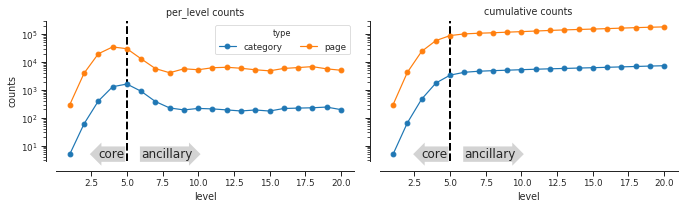

In [9]:
g = (sns.FacetGrid(data=df_t, #x="level", y="counts", 
                   col="variable", hue="type", 
                   legend_out=False,
                   aspect=1.6)
     .set(yscale = 'log')
     .map(plt.axvline, x=5, lw=2, color="k", linestyle="--")
    )
g = (g.map(plt.plot, "level", "counts", marker="o")
     .add_legend(ncol=2)
     .set_titles("{col_name} counts")
    )


core_bbox_props = dict(boxstyle="larrow,pad=0.1", fc="lightgrey", lw=0)
ancillary_bbox_props = dict(boxstyle="rarrow,pad=0.1", fc="lightgrey", lw=0)

for ax in g.axes.flatten():
    ax.annotate(
        'core', xy=(4.8, 5),
        ha="right", va="center",
        size=12,
        bbox=core_bbox_props
    )
    ax.annotate(
        'ancillary', xy=(6, 5),
        ha="left", va="center",
        size=12,
        bbox=ancillary_bbox_props
    )
sns.despine(offset=10)
plt.tight_layout()

plt.savefig("../reports/figures/WikicsshLevelCounts.pdf")